## Importance

Only one-third of the world’s large rivers still have their free-flowing status. The loss of connectivity in rivers has major global impacts. Rivers are essential for both human needs and ecosystem health.  They provide humans with food and water, domestically and agriculturally, and also can be sources of transportation and power through hydroelectric generation. We have used dams to control rivers for our needs and this fragmentation has had a negative impact on biodiversity and the overall health of riparian systems.  The disruption in movement and exchange of water, nutrients, organisms and sediment has impacted ecosystem processes.  

We know that dams have the biggest impact on a rivers' free-flowing status so our main objective will be to quantify which types of dams have the largest impact. If we can use dam classification to understand more specifically the impacts they have on rivers then we can help conservation efforts be more concentrated and have a better understanding of what issues need to be addressed.  This will also be helpful to create sound arguments against the construction of new dams and help with proposals to remove existing dams. We also want to understand how the biggest impact dam on a river’s free flowing status varies by Continent, Country, River Basin, and River Size.

## Previous Studies

There has been a lot of research done on the connectivity of rivers and also the classification of dams. This work just has not been put together. Our two major sources for data will be from “Mapping the worlds free-flowing rivers Geodatabase” (FFR) and “Global River and Dam Database” (GRanD).  The Nature publication of “Mapping the world’s free-flowing rivers” created a global database of FFR and assigned a Connectivity Status Index to each reach, and the GRanD team created a database of global large dams and reservoirs with Main Use attributes. Both datasets will be vital resources for our project.
In addition, in 2020, a different Earth Data Analytics group tackled a similar idea, focusing on how future hydropower dams would affect the FFR and protected areas around the globe. 

## Methods

Our aim is to work on a global scale. We have two large geodatabases that we need to process: 1) GRanD and 2) FFR. Both datasets are described in <a href=”https://www.nature.com/articles/s41586-019-1111-9” target="_blank">"Mapping the world's free flowing rivers" paper</a>. Opening the data for the FFR was particularly challenging because of its size of over 10 million river reaches.  There are over 7,000 dams with attributes distributed across the globe in the GRanD dataset and over 5,700 dams have a designated main purpose of use so it was easier to access. Both datasets can be read into geopandas and the data can be explored. We created a global map with country boundaries and plotted the dams by type. 

In [ ]:
# Create global map figure of dam types

# Color dictionary
dam_color = {'Irrigation': 'black',
             'Hydroelectricity': 'red',
             'Water supply': 'blue',
             'Flood control': 'yellow',
             'Recreation': 'green',
             'Other': 'purple',
             'Navigation': 'orange',
             'Fisheries': 'pink',
             'Unknown': 'magenta'}

# Plot the data
fig, ax = plt.subplots(figsize=(25, 20))

# Plot each dam colored by Main Use
for ctype, dams in global_dams.groupby('MAIN_USE'):
    color_dam = dam_color[ctype]
    label = ctype
    dams.plot(color=color_dam,
              ax=ax,
              label=label)

# Plot the global countries borders map
countries_border.plot(color="none", edgecolor="black", linewidth=.5, ax=ax)

# Set legend, title, and plot settings
ax.legend()
ax.set_title("GRanD Dataset Dam Location by Type", fontsize=24)
plt.legend(fontsize=20)
ax.set_axis_off()
plt.axis('equal')

plt.show()

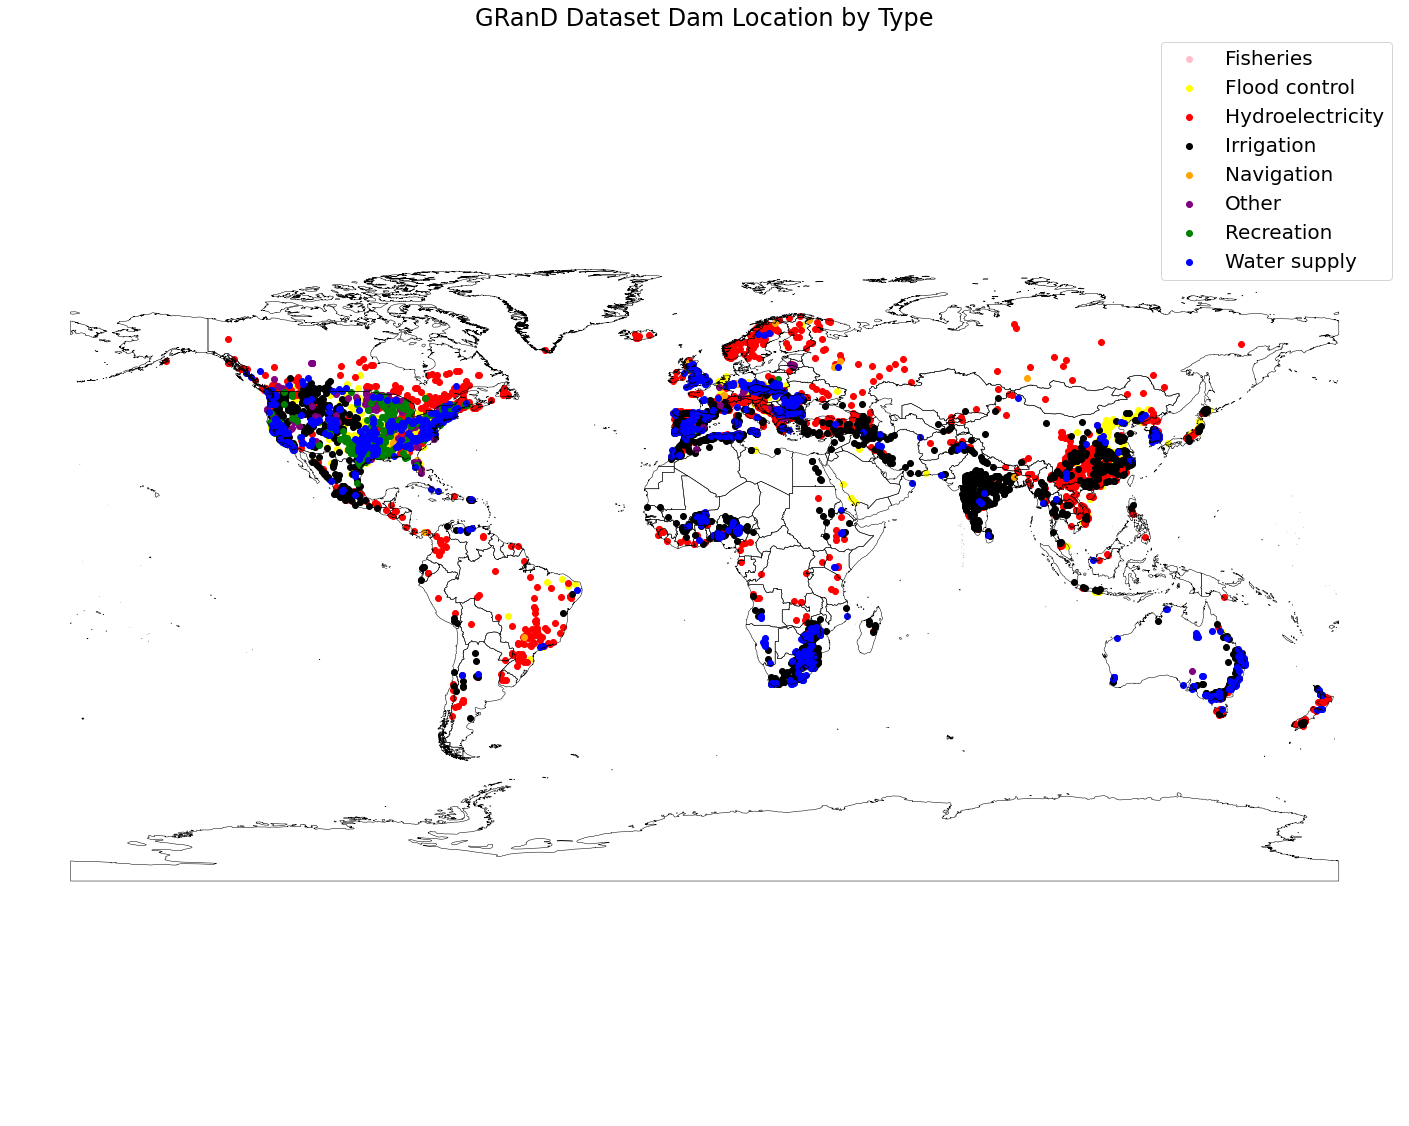

## Summary/ Conclusions

Our project is at the data gathering and exploration stage and we will be better positioned to address our specific research questions over the next couple of months. We are interested in the geographic patterns in the types of dams by continent and how they alter the free-flowing status of rivers. As a preliminary step, we examined the number of dams by type across six continents . 
The barcharts show that there is spatial variation in the types of dams and their densities across continents, which may be related to both differences in human needs in an area, level of industrial development, and data quality in representing dams on the landscape.

In [ ]:
# Create boxplot figure of dam type counts by continent

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle("Dam Type Count by Continent", fontsize=35)

# Create Plots
# Plot Africa
for ctype, dam in dam_africa.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax1.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax1.set(ylabel="Count")
    ax1.set_ylim(0, 700)
    ax1.set_title('Africa', fontsize=30)
ax1.grid(axis="y")
## Note:code is repeated for 6 continents, we will work to automate this task into a function
# Rotate x-axis labels
plt.setp((ax1.get_xticklabels(), ax2.get_xticklabels(), ax3.get_xticklabels(
), ax4.get_xticklabels(), ax5.get_xticklabels(), ax6.get_xticklabels(), ), rotation=45)

# Create legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc=1, bbox_to_anchor=(
    1.01, 0.9), fontsize='xx-large')

plt.show()

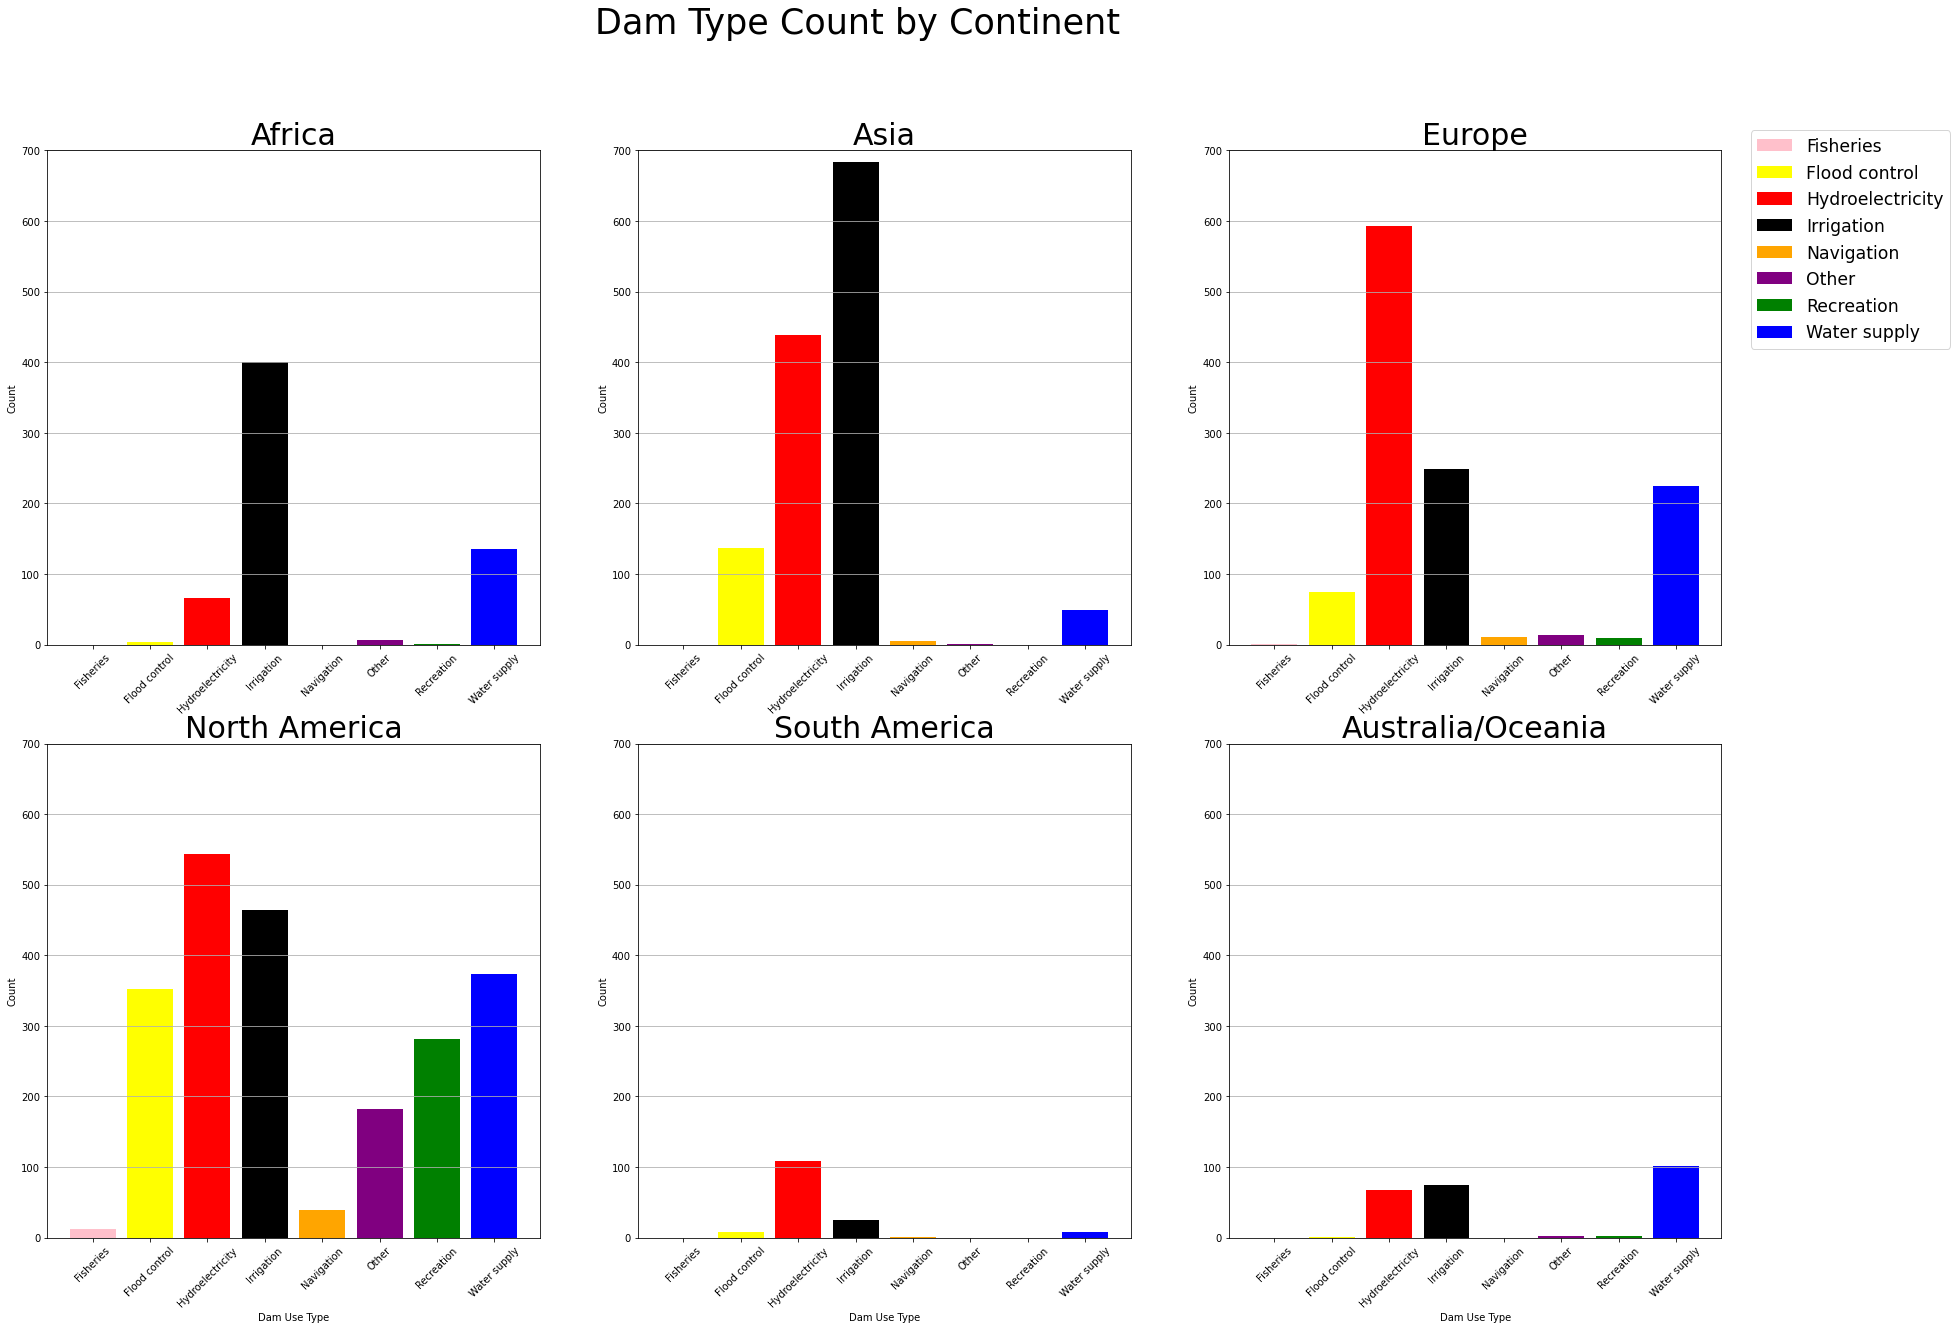

We also examined patterns between landscape characteristics and dam type. At a global scale, there are distinct patterns in river catchment area and dam type such that hydroelectric and navigation dams tend to be built on large sized catchments, whereas dams built for water supply and flood control tend to be built in smaller sized catchments. Across the six continents we see similar patterns . These relationships provide insight on how much river discharge the dam may be intercepting and altering downstream flow. 

In [ ]:
# Create boxplot figure of dam type counts by continent

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle(
    "By Continent Boxplot Natural Log Catchment Area by Dam Type", fontsize=35)

# Create plots
# Plot Africa
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_africa, palette=dam_color, ax=ax1)
ax1.xaxis.set_tick_params(rotation=45)
ax1.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax1.set_title('Africa', fontsize=30)
## Note:code is repeated for 6 continents, we will work to automate this task into a function

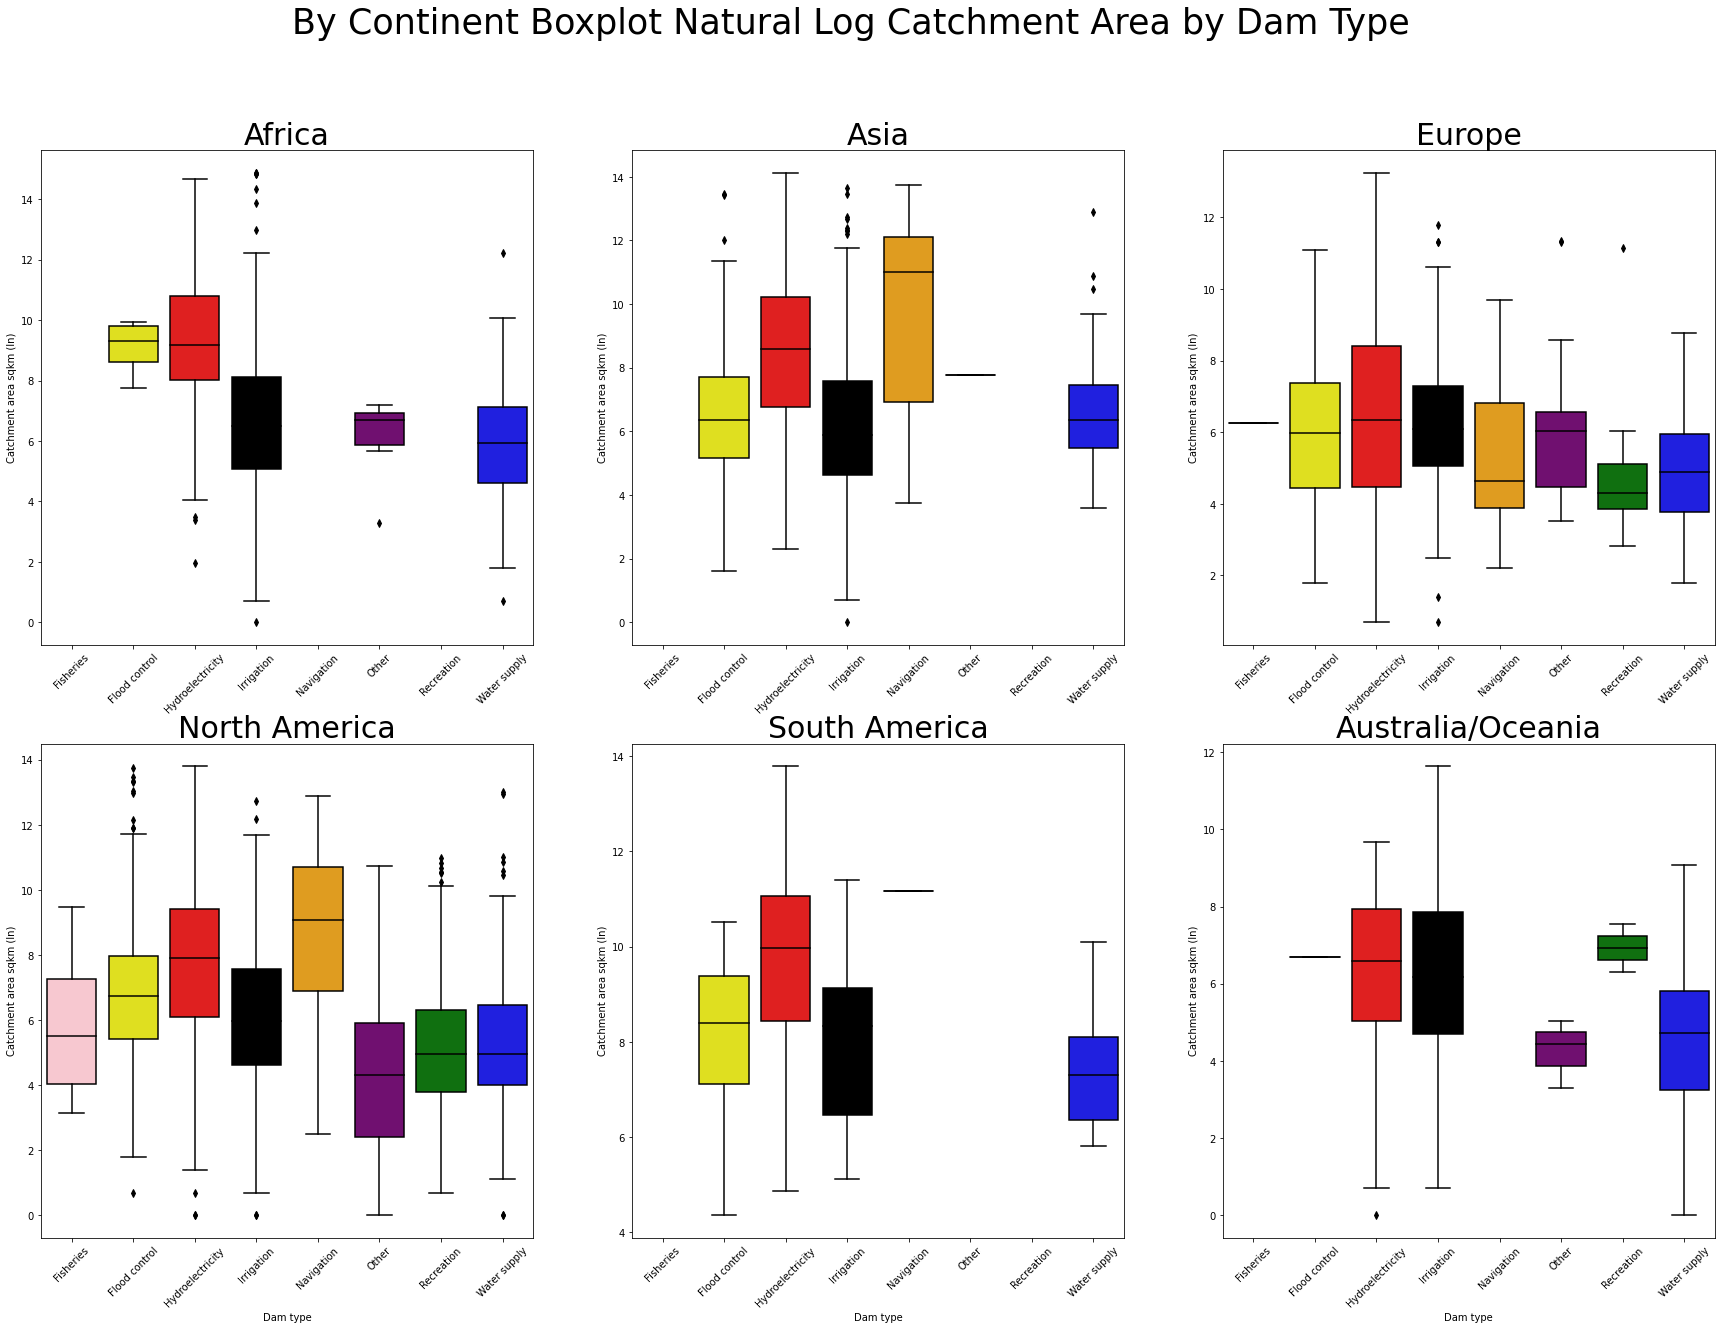

The FFR is very data rich and may pose some challenges to work with. We will work with river and dam data in Africa as a pilot project to develop our methods because it has a moderate amount of information yet still includes a variety of dam types. We will later apply our methods to the other continents. We filtered the free-flowing river data for Africa by including river reach objects that had been QAQCed by the dataset developer that was indicated by INC==1. This resulted in ~411,000 reach objects and made the data a bit more manageable. We color coded the FRR river reach data by River Order to examine spatial patterns in river size. River Order is a metric developed for the FFR dataset that ranks river reaches by their position along a river network with values ranging from 1 to 10. The interpretation of river order is 1 being very large and 10 as small, headwater rivers. Overlaying the GRanD dams over the FFR data, we see spatial patterns in where dams and their use are located in Africa. Water supply and irrigation dams are spatially clustered, whereas hydroelectric dams appear more dispersed across the continent.

In [ ]:
## insert code/Insert plot for Africa using copy/paste in a markdown cell

Our next steps are to develop criteria to filter the FFR dataset to make it more manageable. We also plan on automating some of our workflow by creating functions and having less copy and paste work. We are working with Jeff and Natalie to determine if we can subset reaches by River Order, e.g.,  River Order 10 reaches are likely to be very small and not have GRanD dams. Ultimately, we are interested in examining patterns and relationships among dam types and river connectivity and how they vary across geographic settings. To do this we need to spatially join the GRanD and FRR datasets to look at the dam and river attributes together. We will work with Jeff and Natalie to develop other response metrics of interest to quantify how dams may disrupt free-flowing status of rivers. For example we are interested in weighting dams by the proportion of river discharge they intercept relative to the full river network to assess how they may impact the movement of water, materials, and organisms across the landscape. We hypothesize that dams that are built in upper headwater reaches may have more localized impacts compared to dams further down the river network that may significantly disrupt the accumulation of materials moving to downstream areas. We will work closely with our mentors at WWF and apply reproducible open science practices to our code development. 

In [ ]:
## Can  be used to convert or can download as .html and then upload
#! jupyter nbconvert --to html fergus-pinke-rantz.ipynb